#### Q.1. 
sum(xi)1to10 = 10, xi can take 0,1 or 2
How many unique solution this equation has? Each sequence of will be treated
as a unique solution (ex : 0111111112, 1011111112 are two different
solutions).
Solve this using R/Matlab/Excel

In [26]:
import pandas as pd
import numpy as np
import math
import itertools
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
count = 0
def perm(c0, c1, c2):
    return (math.factorial(10)/(math.factorial(c0)*math.factorial(c1)*math.factorial(c2)))

for c2 in range(6):
    c1 = 10-2*c2
    c0 = 10 - c1 - c2
    count += perm(c2,c1,c0)

print count

8953


#### Q.2. 

There are 10 different files in a folder named as Salary_YYYYMMDD.csv. All files
contain same columns: Name, Salary. For example file Salary_20160101.csv will
contain the salary of the employees for Jan’16, similarly Salary_20160229.csv will
contain salary for Feb’16. Read all files from the folder and create one single csv
file named Salary.csv which will contain the salary information across 10 months for
all the employees.( column names will : employee; sal_jan; sal_feb;..... )

In [28]:
def salary(directory = './'):
    all_files = []
    salary_df = pd.DataFrame(columns = ['Name'])
    directory = os.path.join(directory)
    for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                f=open(file, 'r')
                f.name
                all_files.append(f.name.split('_')[1].split('.csv')[0])
                f.close()
    all_months = []
    for date in all_files:
        temp = datetime.datetime.strptime(date, '%Y%m%d')
        all_months.append(temp.strftime('%B'))
        
    for i in range(len(all_files)):
        df = pd.read_csv('./Salary_'+str(all_files[i])+'.csv')
        df['Salary_'+all_months[i]] = df['Salary']
        df.drop(['Salary'], axis = 1, inplace = True)
        salary_df = pd.DataFrame.merge(salary_df, df, how="outer")
    salary_df.to_csv('./output.csv')   
    return salary_df

In [6]:
salary()

,Name,Salary_January,Salary_February,Salary_March
0,alex,67,67,67
1,susan,60,100,80
2,mark,30,900,40


#### Q3. Simulate a Brownian motion for 100 different paths.
Assuming randomness of numbers is in a range say (-100 to 100)

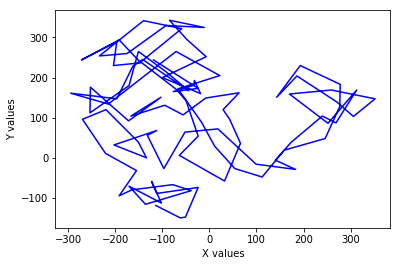

In [29]:
def brownian_motion(x, y):
    x_new = x + np.random.randint(-100, 100)
    y_new = y + np.random.randint(-100, 100)
    return x_new, y_new

x_ls = []
y_ls = []
x, y = brownian_motion(np.random.randint(1,10), np.random.randint(1,10))
for i in range(101):
    x1, y1 = brownian_motion(x,y)
    x_ls.append(x1)
    y_ls.append(y1)
    x,y = x1,y1
    
plt.plot(x_ls, y_ls, 'b-')
plt.xlabel('X values')
plt.ylabel('Y values')

#### Q.4.
A stock can move up by 1$ with probability .4, can go down by 1$ with probability
.3 or can stay at the same price. Simulate the possible prices of the stock after 30
days. Do this using 1000 simulation.

In [30]:
def stock_movement(price):
    movement = np.random.choice([1,-1,0], p =[0.4,0.3,0.3])
    return price + movement

In [31]:
def monthly_movement(price=0):
    for i in range(30):
        price = stock_movement(price)
    return price

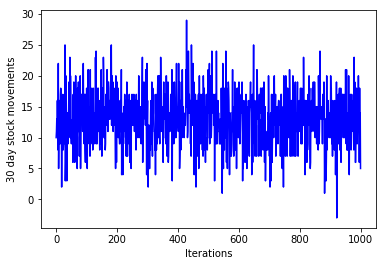

In [32]:
initial_price = 10
possible_prices = []
for i in range(1000):
    possible_prices.append(monthly_movement(initial_price))
plt.plot(np.arange(1000),possible_prices, 'b-')
plt.xlabel('Iterations')
plt.ylabel('30 day stock movements')
plt.show()

#### Q.5.
X = c(list(4,5), c(7,8))
Y = c(list(4,5), list(7,8))
Is X = Y?

#### Answer: 
The two types of Data cannot be compared as R only allows comparison of similar data types. As Y is a vector of lists and X is a vector of a list and a vector, they are not exactly the same data types.

#### Q.6.
How will you calculate the count of NA values in M x N data frame?

#### Ans: 
Create a dummy dataframe with nan values and then use is null function to count the number of nans

In [33]:
df = pd.DataFrame({'a':[1,2,np.nan], 'b':[np.nan,1,np.nan]})
df.isnull().sum()

a    1
b    2
dtype: int64